In [371]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.linear_model as skl
import sklearn.model_selection as skm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
#!pip install ISLP
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial

print("Importing libraries... Done!")

Importing libraries... Done!


In [372]:
if 1:
    df_train_org = pd.read_csv(r"C:\Users\ngocn\OneDrive\Documents\MATH LU\BERN02---Computational-Science-Reproducible-Data-Science-and-Statistical-Learning\BERNO2-kissing-challenge-2025\Data\train.csv")
    df_train_org.head()

In [373]:
if 0:
    df_train_org = pd.read_csv(r"C:\Users\ngocn\OneDrive\Documents\MATH LU\BERN02---Computational-Science-Reproducible-Data-Science-and-Statistical-Learning\BERNO2-kissing-challenge-2025\Data\train_cleaned.csv")
    df_train_org.head()

In [374]:
df_test_org = pd.read_csv(r"C:\Users\ngocn\OneDrive\Documents\MATH LU\BERN02---Computational-Science-Reproducible-Data-Science-and-Statistical-Learning\BERNO2-kissing-challenge-2025\Data\test.csv")
df_test_org.head()

,ID,Sex,SexPref,Age,Country_Res,Country_Born,HPP_9,GDP,GINI,SexRatio.2017est.,...,prec_mean_anual_Res,snow_cover_days_Res,t_mean_Res,t_mean_coldest_month_Res,t_mean_warmest_month_Res,prec_mean_anual_Born,snow_cover_days_Born,t_mean_Born,t_mean_coldest_month_Born,t_mean_warmest_month_Born
0,6386533568,2,1,25,Germany,Chile,-0.87,50200,27.0,0.97,...,837.165363,30.629372,8.964064,-2.221096,22.129606,2048.469449,64.990759,8.136417,-0.079881,16.925589
1,6089268910,2,1,21,American Samoa,New Zealand,0.27,14500,53.5,0.98,...,5657.832667,0.000000,26.025991,24.732492,27.350933,1751.037183,23.705176,10.076406,1.863378,18.815927
2,6550809117,2,1,31,Australia,Australia,-0.25,49900,30.3,1.01,...,497.546254,0.038584,21.818885,8.770489,34.536445,497.546254,0.038584,21.818885,8.770489,34.536445
3,6434867455,1,2,31,Australia,Australia,-0.25,49900,30.3,1.01,...,497.546254,0.038584,21.818885,8.770489,34.536445,497.546254,0.038584,21.818885,8.770489,34.536445
4,6430313808,2,1,24,Australia,Australia,-0.25,49900,30.3,1.01,...,497.546254,0.038584,21.818885,8.770489,34.536445,497.546254,0.038584,21.818885,8.770489,34.536445


In [375]:
df_train = df_train_org.copy()
df_test = df_test_org.copy()
df_train.shape, df_test.shape

((1406, 45), (938, 44))

In [376]:
df_test.isna().sum()

ID                           0
Sex                          0
SexPref                      0
Age                          0
Country_Res                  0
Country_Born                 0
HPP_9                        0
GDP                          0
GINI                         0
SexRatio.2017est.            0
SexRatio.15.54.              0
UNRegion                     0
RelStatus                    0
RelLength                    0
RelY                         0
RelM                         0
Ethnicity                    1
SRA                          0
SRM                          0
SRH                          0
SRA_Partner                  0
SRM_Partner                  0
SRH_Partner                  0
Hug_Freq                     0
Sex_Freq                     0
Hug_Satis                    0
Sex_Satis                    0
GK_Breath                    0
GK_Scent                     0
GK_Taste                     0
GK_Wet                       0
GK_Contact                   0
GK_Arous

In [377]:
if 0:
    df_test = df_test.dropna()
    df_test.isna().sum()


In [379]:
if 1:
    df_train = df_train.dropna()
    print(df_train.shape)


(469, 45)


In [380]:
df_train.isna().sum()

ID                           0
Sex                          0
SexPref                      0
Age                          0
Country_Res                  0
Country_Born                 0
HPP_9                        0
GDP                          0
GINI                         0
SexRatio.2017est.            0
SexRatio.15.54.              0
UNRegion                     0
RelStatus                    0
RelLength                    0
RelY                         0
RelM                         0
Ethnicity                    0
SRA                          0
SRM                          0
SRH                          0
SRA_Partner                  0
SRM_Partner                  0
SRH_Partner                  0
Hug_Freq                     0
Sex_Freq                     0
Hug_Satis                    0
Sex_Satis                    0
GK_Breath                    0
GK_Scent                     0
GK_Taste                     0
GK_Wet                       0
GK_Contact                   0
GK_Arous

In [381]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression


print("Importing libraries... Done!")

Importing libraries... Done!


In [382]:
X_train = df_train.drop(columns=["Kiss_index", "ID"])
X_test = df_test.drop(columns=["ID"])
X_train.shape, X_test.shape

((469, 43), (938, 43))

In [383]:
y_train = df_train['Kiss_index']
y_train, y_train.shape

(0       0.917
 2       0.078
 3       1.000
 5       0.757
 7       0.177
         ...  
 1380    0.653
 1386    0.987
 1387    0.743
 1395    0.598
 1398    0.420
 Name: Kiss_index, Length: 469, dtype: float64,
 (469,))

In [384]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 469 entries, 0 to 1398
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         469 non-null    int64  
 1   Sex                        469 non-null    int64  
 2   SexPref                    469 non-null    float64
 3   Age                        469 non-null    float64
 4   Country_Res                469 non-null    object 
 5   Country_Born               469 non-null    object 
 6   HPP_9                      469 non-null    float64
 7   GDP                        469 non-null    float64
 8   GINI                       469 non-null    float64
 9   SexRatio.2017est.          469 non-null    float64
 10  SexRatio.15.54.            469 non-null    float64
 11  UNRegion                   469 non-null    float64
 12  RelStatus                  469 non-null    float64
 13  RelLength                  469 non-null    float64
 14

In [385]:
cat_cols = X_train.select_dtypes(include=["object"]).columns
num_cols = X_train.select_dtypes(exclude=["object"]).columns
print(f"Categorical columns: {cat_cols}")
print(f"Numerical columns: {num_cols}")

Categorical columns: Index(['Country_Res', 'Country_Born', 'Ethnicity'], dtype='object')
Numerical columns: Index(['Sex', 'SexPref', 'Age', 'HPP_9', 'GDP', 'GINI', 'SexRatio.2017est.',
       'SexRatio.15.54.', 'UNRegion', 'RelStatus', 'RelLength', 'RelY', 'RelM',
       'SRA', 'SRM', 'SRH', 'SRA_Partner', 'SRM_Partner', 'SRH_Partner',
       'Hug_Freq', 'Sex_Freq', 'Hug_Satis', 'Sex_Satis', 'GK_Breath',
       'GK_Scent', 'GK_Taste', 'GK_Wet', 'GK_Contact', 'GK_Arous',
       'GK_SynchStyle', 'prec_mean_anual_Res', 'snow_cover_days_Res',
       't_mean_Res', 't_mean_coldest_month_Res', 't_mean_warmest_month_Res',
       'prec_mean_anual_Born', 'snow_cover_days_Born', 't_mean_Born',
       't_mean_coldest_month_Born', 't_mean_warmest_month_Born'],
      dtype='object')


In [386]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])
lambdas = 10**np.linspace(8, -2, 100)
ridge = RidgeCV(alphas=lambdas, store_cv_values=True)
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', ridge)
])
ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test)

c:\Users\ngocn\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


In [387]:
X_test.shape

(938, 43)

In [388]:
submission_ridge = pd.DataFrame({
    "ID": df_test["ID"],
    "Kiss_index": y_pred_ridge
})
submission_ridge.head()

,ID,Kiss_index
0,6386533568,0.657188
1,6089268910,0.659447
2,6550809117,0.647239
3,6434867455,0.654939
4,6430313808,0.650176


In [389]:
submission_ridge.to_csv(r"C:\Users\ngocn\OneDrive\Documents\MATH LU\BERN02---Computational-Science-Reproducible-Data-Science-and-Statistical-Learning\BERNO2-kissing-challenge-2025\Data\submission_ridge03.csv", index=False)

In [334]:
print("Model trained successfully!")
print("Best lambda chosen by cross-validation:", ridge_pipeline.named_steps["ridge"].alpha_)

Model trained successfully!
Best lambda chosen by cross-validation: 46415.888336127726


In [335]:
submission_ridge.shape

(938, 2)

## Using sklearn.linear_model.ElasticNet.path

In [336]:
X_processed = preprocessor.fit_transform(X_train)
X_processed

<688x336 sparse matrix of type '<class 'numpy.float64'>'
	with 29584 stored elements in Compressed Sparse Row format>

In [337]:
X_dense = X_processed.toarray()  # Convert sparse to dense
Xs_train = X_dense - X_dense.mean(axis=0)[None, :]
Xs_train /= X_dense.std(axis=0)[None, :]
Xs_train.shape

(688, 336)

In [338]:
X_dense.shape

(688, 336)

In [339]:
coeffs = skl.ElasticNet.path(Xs_train, 
                             y_train.values, 
                             l1_ratio=0., 
                             alphas=lambdas)[1]
coeffs

c:\Users\ngocn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\ngocn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171.77154939949332, tolerance: 0.0343543099
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\ngocn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\ngocn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Object

array([[-9.39606702e-11, -1.18564918e-10, -1.49611958e-10, ...,
        -6.15965206e-03, -6.23103505e-03, -6.29323687e-03],
       [-7.86785240e-12, -9.92810389e-12, -1.25278465e-11, ...,
        -7.30425209e-03, -7.35695251e-03, -7.40437776e-03],
       [ 7.92553060e-12,  1.00008849e-11,  1.26196849e-11, ...,
         8.19567598e-03,  8.25107695e-03,  8.28280566e-03],
       ...,
       [ 3.06599837e-11,  3.86885112e-11,  4.88193639e-11, ...,
         8.87328383e-04,  7.60002414e-04,  6.08718453e-04],
       [ 3.29491264e-11,  4.15770817e-11,  5.24643264e-11, ...,
         2.94131373e-03,  2.83127960e-03,  2.69419446e-03],
       [-4.16733839e-11, -5.25858455e-11, -6.63558099e-11, ...,
        -5.16401421e-03, -5.20711847e-03, -5.24200396e-03]])

In [340]:
coeffs.shape

(336, 100)

In [341]:
design = MS(df_train.columns.drop(["Kiss_index", "ID"])).fit(df_train)
design

ModelSpec(terms=Index(['Sex', 'SexPref', 'Age', 'Country_Res', 'Country_Born', 'HPP_9', 'GDP',
       'GINI', 'SexRatio.2017est.', 'SexRatio.15.54.', 'UNRegion', 'RelStatus',
       'RelLength', 'RelY', 'RelM', 'Ethnicity', 'SRA', 'SRM', 'SRH',
       'SRA_Partner', 'SRM_Partner', 'SRH_Partner', 'Hug_Freq', 'Sex_Freq',
       'Hug_Satis', 'Sex_Satis', 'GK_Breath', 'GK_Scent', 'GK_Taste', 'GK_Wet',
       'GK_Contact', 'GK_Arous', 'GK_SynchStyle', 'prec_mean_anual_Res',
       'snow_cover_days_Res', 't_mean_Res', 't_mean_coldest_month_Res',
       't_mean_warmest_month_Res', 'prec_mean_anual_Born',
       'snow_cover_days_Born', 't_mean_Born', 't_mean_coldest_month_Born',
       't_mean_warmest_month_Born'],
      dtype='object'))

In [342]:
D = design.fit_transform(df_train)
D = D.drop(columns=["intercept"])
D.head()

,Sex,SexPref,Age,Country_Res,Country_Born,HPP_9,GDP,GINI,SexRatio.2017est.,SexRatio.15.54.,...,prec_mean_anual_Res,snow_cover_days_Res,t_mean_Res,t_mean_coldest_month_Res,t_mean_warmest_month_Res,prec_mean_anual_Born,snow_cover_days_Born,t_mean_Born,t_mean_coldest_month_Born,t_mean_warmest_month_Born
0,2,1.0,42.0,United Kingdom of Great Britain and Northern I...,United Kingdom of Great Britain and Northern I...,-1.063333,43600.0,32.4,0.99,1.04,...,1207.852988,1.168566,9.187962,1.301625,18.040345,1207.852988,1.168566,9.187962,1.301625,18.040345
1,2,1.0,28.0,Germany,Germany,-0.870000,50200.0,27.0,0.97,1.03,...,837.165363,30.629372,8.964064,-2.221096,22.129606,837.165363,30.629372,8.964064,-2.221096,22.129606
2,2,3.0,22.0,Germany,Germany,-0.870000,50200.0,27.0,0.97,1.03,...,837.165363,30.629372,8.964064,-2.221096,22.129606,837.165363,30.629372,8.964064,-2.221096,22.129606
3,2,1.0,23.0,Germany,Germany,-0.870000,50200.0,27.0,0.97,1.03,...,837.165363,30.629372,8.964064,-2.221096,22.129606,837.165363,30.629372,8.964064,-2.221096,22.129606
4,2,1.0,32.0,United Kingdom of Great Britain and Northern I...,United Kingdom of Great Britain and Northern I...,-1.063333,43600.0,32.4,0.99,1.04,...,1207.852988,1.168566,9.187962,1.301625,18.040345,1207.852988,1.168566,9.187962,1.301625,18.040345


In [343]:
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
all_features = num_cols.tolist() + cat_features.tolist()
print(all_features, len(all_features))

['Sex', 'SexPref', 'Age', 'HPP_9', 'GDP', 'GINI', 'SexRatio.2017est.', 'SexRatio.15.54.', 'UNRegion', 'RelStatus', 'RelLength', 'RelY', 'RelM', 'SRA', 'SRM', 'SRH', 'SRA_Partner', 'SRM_Partner', 'SRH_Partner', 'Hug_Freq', 'Sex_Freq', 'Hug_Satis', 'Sex_Satis', 'GK_Breath', 'GK_Scent', 'GK_Taste', 'GK_Wet', 'GK_Contact', 'GK_Arous', 'GK_SynchStyle', 'prec_mean_anual_Res', 'snow_cover_days_Res', 't_mean_Res', 't_mean_coldest_month_Res', 't_mean_warmest_month_Res', 'prec_mean_anual_Born', 'snow_cover_days_Born', 't_mean_Born', 't_mean_coldest_month_Born', 't_mean_warmest_month_Born', 'Country_Res_Australia', 'Country_Res_Brazil', 'Country_Res_Chile', 'Country_Res_Colombia', 'Country_Res_Czechia', 'Country_Res_France', 'Country_Res_Germany', 'Country_Res_India', 'Country_Res_Italy', 'Country_Res_Nigeria', 'Country_Res_Poland', 'Country_Res_United Kingdom of Great Britain and Northern Ireland', 'Country_Res_United States of America', 'Country_Born_Algeria', 'Country_Born_Australia', 'Country

In [344]:
coeffs_path = pd.DataFrame(coeffs.T,
                           columns = all_features,
                           index = -np.log(lambdas))
coeffs_path.index.name = '-log(lambda)'
coeffs_path.head()

,Sex,SexPref,Age,HPP_9,GDP,GINI,SexRatio.2017est.,SexRatio.15.54.,UNRegion,RelStatus,...,Ethnicity_scottish,Ethnicity_slovak,Ethnicity_west slavic- czech,Ethnicity_white,Ethnicity_white,Ethnicity_white Scottish,Ethnicity_white caucasian,Ethnicity_white central european,Ethnicity_white scottish,Ethnicity_yoruba
-log(lambda),,,,,,,,,,,,,,,,,,,,,
-18.420681,-9.396067e-11,-7.867852e-12,7.925531e-12,-1.077207e-10,5.644160e-11,-1.019938e-10,-9.319670e-11,8.214538e-11,7.032567e-11,7.017803e-11,...,-1.196604e-10,-8.913849e-11,2.570017e-11,1.204329e-10,1.218442e-10,9.017770e-11,5.431446e-11,3.065998e-11,3.294913e-11,-4.167338e-11
-18.188096,-1.185649e-10,-9.928104e-12,1.000088e-11,-1.359281e-10,7.122122e-11,-1.287016e-10,-1.176009e-10,1.036557e-10,8.874093e-11,8.855463e-11,...,-1.509943e-10,-1.124800e-10,3.242994e-11,1.519690e-10,1.537499e-10,1.137913e-10,6.853707e-11,3.868851e-11,4.157708e-11,-5.258585e-11
-17.955512,-1.496120e-10,-1.252785e-11,1.261968e-11,-1.715217e-10,8.987098e-11,-1.624030e-10,-1.483955e-10,1.307987e-10,1.119783e-10,1.117433e-10,...,-1.905332e-10,-1.419337e-10,4.092194e-11,1.917632e-10,1.940104e-10,1.435884e-10,8.648398e-11,4.881936e-11,5.246433e-11,-6.635581e-11
-17.722928,-1.887889e-10,-1.580835e-11,1.592424e-11,-2.164359e-10,1.134043e-10,-2.049293e-10,-1.872539e-10,1.650492e-10,1.413006e-10,1.410040e-10,...,-2.404256e-10,-1.791000e-10,5.163764e-11,2.419777e-10,2.448133e-10,1.811880e-10,1.091304e-10,6.160305e-11,6.620247e-11,-8.373153e-11
-17.490343,-2.382245e-10,-1.994788e-11,2.009410e-11,-2.731111e-10,1.431000e-10,-2.585914e-10,-2.362876e-10,2.082684e-10,1.783012e-10,1.779269e-10,...,-3.033827e-10,-2.259986e-10,6.515931e-11,3.053412e-10,3.089194e-10,2.286333e-10,1.377069e-10,7.773423e-11,8.353804e-11,-1.056572e-10


In [345]:
zoomed_path = coeffs_path[(coeffs_path.index < -1) & (coeffs_path.index > -4)]

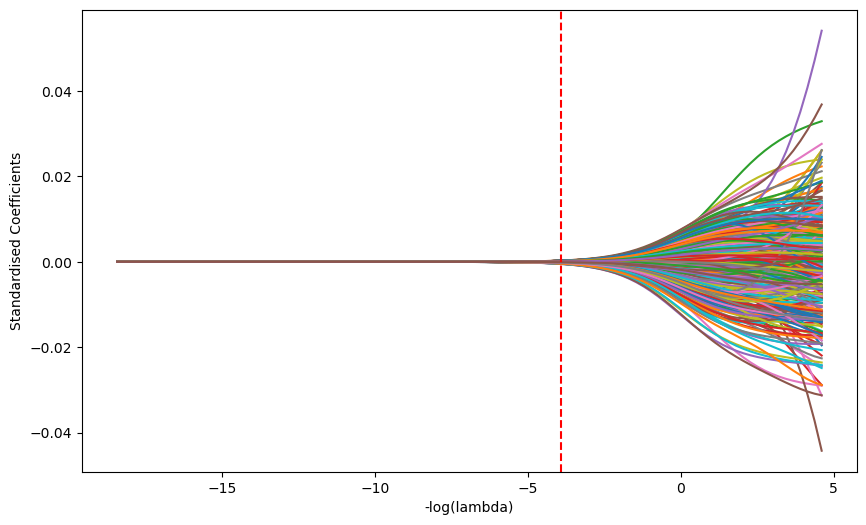

In [346]:
chosen_lambda = 50
neglog_lambda = -np.log(chosen_lambda)


path_fig, ax = plt.subplots(figsize=(10, 6))
coeffs_path.plot(ax=ax, legend=False)
ax.axvline(x=neglog_lambda, color='red', linestyle='--', label=f'Chosen λ = {chosen_lambda}')

ax.set_xlabel('-log(lambda)')
ax.set_ylabel('Standardised Coefficients')
#ax.legend(all_features, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [347]:
neglog_lambda

-3.912023005428146

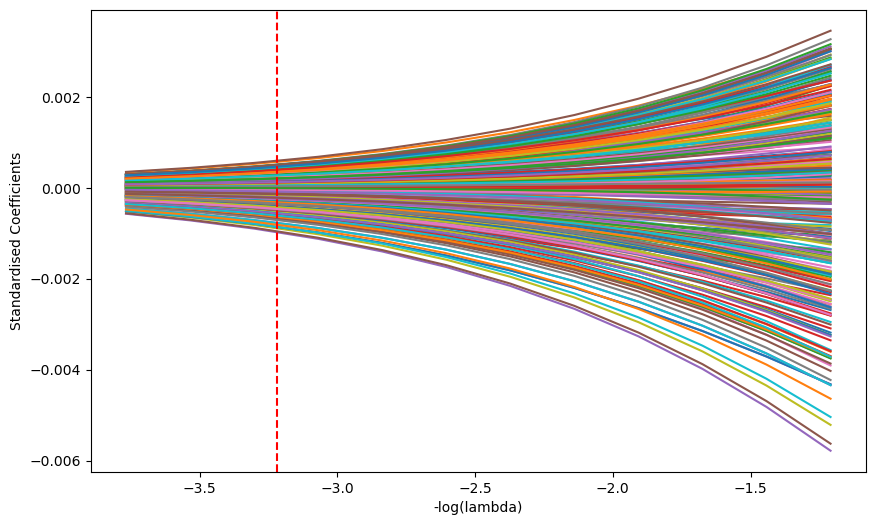

In [348]:
chosen_lambda = 25
neglog_lambda = -np.log(chosen_lambda)


path_fig, ax = plt.subplots(figsize=(10, 6))
zoomed_path.plot(ax=ax, legend=False)
ax.axvline(x=neglog_lambda, color='red', linestyle='--', label=f'Chosen λ = {chosen_lambda}')

ax.set_xlabel('-log(lambda)')
ax.set_ylabel('Standardised Coefficients')
#ax.legend(all_features, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Left side (high λ): Most coefficients are close to zero. This is strong regularization—both Ridge and Lasso shrink coefficients.
- Right side (low λ): Coefficients grow, and more features become influential. Lasso may set some coefficients exactly to zero, while Ridge keeps them small but non-zero.


- On the far left (high λ): all coefficients near zero → too much regularization.
- In the middle: a few lines start to diverge → good candidate region.
- On the far right (low λ): many lines diverge wildly → overfitting risk.


 Pick a λ in the middle zone, where:
- A few features have meaningful coefficients.
- Most others are still suppressed.
- The model is expressive but not overfit.

25-35




In [349]:
zoomed_choices = coeffs_path[(coeffs_path.index < -3.2) & (coeffs_path.index > -3.5) ]
zoomed_choices

,Sex,SexPref,Age,HPP_9,GDP,GINI,SexRatio.2017est.,SexRatio.15.54.,UNRegion,RelStatus,...,Ethnicity_scottish,Ethnicity_slovak,Ethnicity_west slavic- czech,Ethnicity_white,Ethnicity_white,Ethnicity_white Scottish,Ethnicity_white caucasian,Ethnicity_white central european,Ethnicity_white scottish,Ethnicity_yoruba
-log(lambda),,,,,,,,,,,,,,,,,,,,,
-3.302698,-0.000331,-0.00004,0.000022,-0.000256,0.000098,-0.000255,-0.000338,0.000207,0.000161,0.000242,...,-0.000428,-0.000319,0.000088,0.000412,0.000425,0.000315,0.000186,0.000106,0.000114,-0.000131


In [350]:
zoomed_choices.index

Index([-3.3026978101530755], dtype='float64', name='-log(lambda)')

In [351]:
beta_hat = zoomed_choices.loc[zoomed_choices.index[0]]
beta_hat

Sex                                -0.000331
SexPref                            -0.000040
Age                                 0.000022
HPP_9                              -0.000256
GDP                                 0.000098
                                      ...   
Ethnicity_white Scottish            0.000315
Ethnicity_white caucasian           0.000186
Ethnicity_white central european    0.000106
Ethnicity_white scottish            0.000114
Ethnicity_yoruba                   -0.000131
Name: -3.3026978101530755, Length: 336, dtype: float64

In [352]:
np.linalg.norm(beta_hat)

0.005874979429339882

In [353]:
ridge = skl.ElasticNet(alpha=chosen_lambda, l1_ratio=0)

In [354]:
validation = skm.ShuffleSplit(n_splits=5,
                              test_size=0.2,
                              random_state=42)
ridge.alpha = chosen_lambda
results = skm.cross_validate(ridge, 
                             Xs_train, 
                             y_train, 
                             cv=validation, 
                             return_train_score=True, 
                             scoring='neg_mean_squared_error')
-results['test_score']

c:\Users\ngocn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.552e+01, tolerance: 3.180e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\ngocn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.594e+01, tolerance: 3.264e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

array([0.06364532, 0.05716012, 0.05889166, 0.05488212, 0.05872242])

In [355]:
lambda_opt = ridge_pipeline.named_steps["ridge"].alpha_
lambda_opt

46415.888336127726

In [356]:

ridge.alpha = lambda_opt
results = skm.cross_validate(ridge, 
                             Xs_train, 
                             y_train, 
                             cv=validation, 
                             return_train_score=True, 
                             scoring='neg_mean_squared_error')
-results['test_score']

c:\Users\ngocn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.590e+01, tolerance: 3.180e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\ngocn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.632e+01, tolerance: 3.264e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

array([0.06331427, 0.05725932, 0.05859373, 0.05499796, 0.05869019])

In [357]:
ridge = skl.ElasticNet(alpha=chosen_lambda, l1_ratio=0.)
scaler = StandardScaler(with_mean=True, with_std=True)
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', ridge)
])
pipe.fit(X_train, y_train)

c:\Users\ngocn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.22253723262396, tolerance: 0.004053723288226745
  model = cd_fast.sparse_enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Sex', 'SexPref', 'Age', 'HPP_9', 'GDP', 'GINI', 'SexRatio.2017est.',
       'SexRatio.15.54.', 'UNRegion', 'RelStatus', 'RelLength', 'RelY', 'RelM',
       'SRA', 'SRM', 'SRH', 'SRA_Partner', 'SRM_Partner', 'SRH_Partner',
       'Hug_Freq', 'Sex_Freq', 'Hug_Satis', 'Sex_Satis', 'GK_Breath',
       'GK_Sce...
       't_mean_Res', 't_mean_coldest_month_Res', 't_mean_warmest_month_Res',
       'prec_mean_anual_Born', 'snow_cover_days_Born', 't_mean_Born',
       't_mean_coldest_month_Born', 't_mean_warmest_month_Born'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Country_Res', 'Country_Born', 'Ethnicity'], dtype='object'))])),
                ('ridge', ElasticNet(alpha=25, l1_ratio=0.0))])

In [358]:
param_grid = {'ridge__alpha': lambdas}
grid = skm.GridSearchCV(pipe,
                        param_grid,
                        cv=validation,
                        scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
grid.best_params_['ridge__alpha']
grid.best_estimator_

c:\Users\ngocn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.900180369703259, tolerance: 0.003180036077272727
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\ngocn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.321548739952732, tolerance: 0.0032643097500000004
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\ngocn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.226354449246344, tolerance: 0.0032452708938181815
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\ngocn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinat

KeyboardInterrupt: 

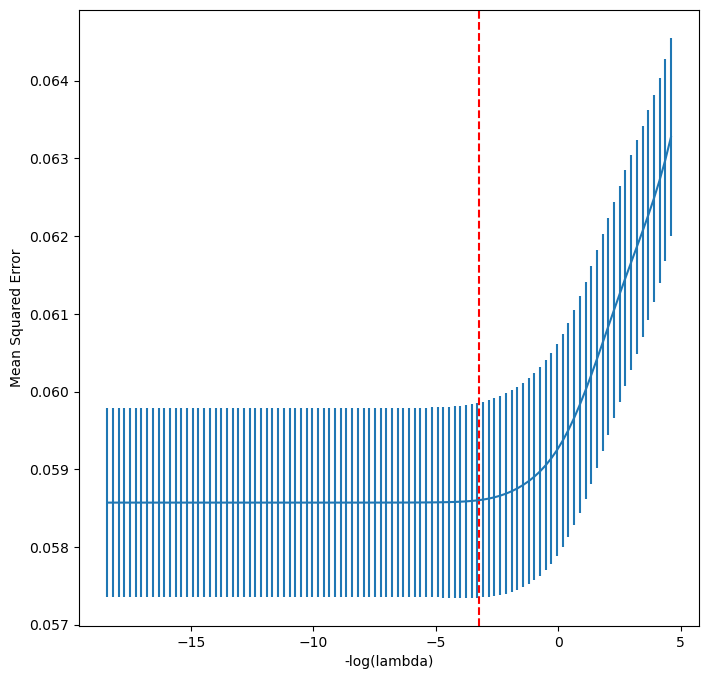

In [ ]:
ridge_fig, ax = plt.subplots(figsize=(8, 8))
ax.errorbar(-np.log(lambdas),
            -grid.cv_results_['mean_test_score'],
            yerr=grid.cv_results_['std_test_score'] / np.sqrt(5))
ax.axvline(x=neglog_lambda, color='red', linestyle='--', label=f'Chosen λ = {chosen_lambda}')
ax.set_xlabel('-log(lambda)')
ax.set_ylabel('Mean Squared Error')
plt.show()

In [ ]:
y_pred_ridge = grid.predict(X_test)
y_pred_ridge

array([0.66363808, 0.66363808, 0.66363808, 0.66363808, 0.66363808,
       0.66363808, 0.66363808, 0.66363808, 0.66363808, 0.66363808,
       0.66363808, 0.66363808, 0.66363808, 0.66363808, 0.66363808,
       0.66363808, 0.66363808, 0.66363808, 0.66363808, 0.66363808,
       0.66363808, 0.66363808, 0.66363808, 0.66363808, 0.66363808,
       0.66363808, 0.66363808, 0.66363808, 0.66363808, 0.66363808,
       0.66363808, 0.66363808, 0.66363808, 0.66363808, 0.66363808,
       0.66363808, 0.66363808, 0.66363808, 0.66363808, 0.66363808,
       0.66363808, 0.66363808, 0.66363808, 0.66363808, 0.66363808,
       0.66363808, 0.66363808, 0.66363808, 0.66363808, 0.66363808,
       0.66363808, 0.66363808, 0.66363808, 0.66363808, 0.66363808,
       0.66363808, 0.66363808, 0.66363808, 0.66363808, 0.66363808,
       0.66363808, 0.66363808, 0.66363808, 0.66363808, 0.66363808,
       0.66363808, 0.66363808, 0.66363808, 0.66363808, 0.66363808,
       0.66363808, 0.66363808, 0.66363808, 0.66363808, 0.66363

In [ ]:
submission_ridge = pd.DataFrame({
    "ID": df_test["ID"],
    "Kiss_index": y_pred_ridge
})
submission_ridge.head()

,ID,Kiss_index
0,6386533568,0.663638
1,6089268910,0.663638
2,6550809117,0.663638
3,6434867455,0.663638
4,6430313808,0.663638


In [ ]:
submission_ridge.to_csv(r"C:\Users\ngocn\OneDrive\Documents\MATH LU\BERN02---Computational-Science-Reproducible-Data-Science-and-Statistical-Learning\BERNO2-kissing-challenge-2025\Data\submission_ridge02.csv", index=False)

In [ ]:
print("Model trained successfully!")
print("Best lambda chosen by cross-validation:", grid.best_params_['ridge__alpha'])

Model trained successfully!
Best lambda chosen by cross-validation: 100000000.0
